# Homework 6, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [2]:
import pandas as pd

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [3]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", nrows = 30000)

In [4]:
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [5]:
df.shape

(30000, 15)

In [6]:
df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

### Answer : 
Each row is a dog that has a license in NYC. `Owner Zip Code` shows the Zip code where a dog owner lives, `Animal Birth` displays a day when a dog was born.

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

### My questions : 
1. Which Zipcode most dog owners live?
2. What is the most popular name among NYC dogs?
3. What is the average age?
4. How many dogs are vaccinated?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [7]:
df['Primary Breed'].value_counts().head(10)

Unknown                                 4777
Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Name: Primary Breed, dtype: int64

<AxesSubplot:>

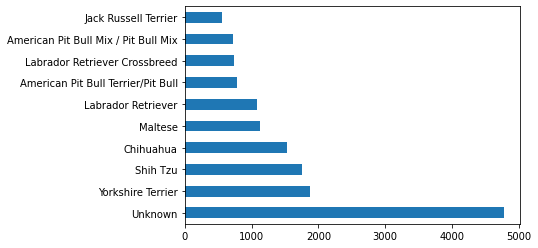

In [8]:
df['Primary Breed'].value_counts().head(10).plot(kind = 'barh')

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

<AxesSubplot:>

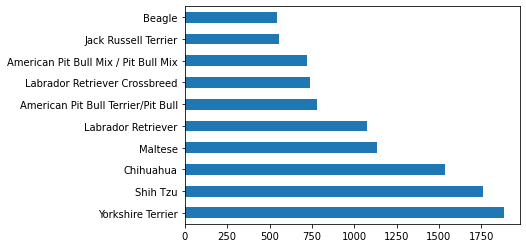

In [9]:
import numpy as np
df['Primary Breed'] = df['Primary Breed'].replace("Unknown", np.nan)
df['Primary Breed'].value_counts().head(10).plot(kind = 'barh')

## What are the most popular dog names?

In [10]:
df['Animal Name'] = df['Animal Name'].replace(['UNKNOWN', 'Unknown'], np.nan)
df['Animal Name'].value_counts()

Max                   202
Bella                 193
Charlie               172
Lola                  146
Rocky                 140
                     ... 
Lola Norfleet           1
Mason Colon Dumeng      1
Owen Burakoff           1
RIO                     1
FRITZIE                 1
Name: Animal Name, Length: 13719, dtype: int64

### Answer :
`"Max"` is the most popular dog name.

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [11]:
df_name = df['Animal Name'] 
df[df_name == 'Hiro']

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
23800,10024,Hiro,M,Silky Terrier,NaN,SILVER,BLOND,NaN,2010-02-01,Yes,No,Yes,2015-07-29 00:22:11.077,2015-07-29,2017-04-25
25413,11201,Hiro,M,Shiba Inu,NaN,RED,WHITE,NaN,2012-03-01,Yes,No,Yes,2015-08-05 09:01:55.410,2015-08-05,2016-06-17


In [12]:
df_name[df_name == 'Max'].value_counts()

Max    202
Name: Animal Name, dtype: int64

In [13]:
df_name[df_name == 'Maxwell'].value_counts()

Maxwell    11
Name: Animal Name, dtype: int64

### Answer :
There are no dogs named `"Hiromi"` but two dogs named `"Hiro"`.

202 dogs are named `"Max"`, while 11 dogs are `"Maxwell"`.

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [14]:
df['Guard or Trained'].value_counts(normalize=True)*100

No     99.914254
Yes     0.085746
Name: Guard or Trained, dtype: float64

### Answer :
`0.085746%` of dogs are guard or trained dogs. (# I noticed it wasn't right later because of NaN issue.)

## What are the actual numbers?

In [15]:
df['Guard or Trained'].value_counts()

No     19809
Yes       17
Name: Guard or Trained, dtype: int64

### Answer :
`17 dogs` are guard or trained dogs.

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [16]:
df['Guard or Trained'].head()

0     No
1     No
2    NaN
3     No
4    NaN
Name: Guard or Trained, dtype: object

In [17]:
df['Guard or Trained'].value_counts(dropna = False)

No     19809
NaN    10174
Yes       17
Name: Guard or Trained, dtype: int64

### Answer : 
There are lots of `NaN` rows. I found them with `.value_counts(dropna = False)`

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [18]:
df['Guard or Trained'] = df['Guard or Trained'].replace(np.nan , 'No')
df['Guard or Trained'].value_counts()

No     29983
Yes       17
Name: Guard or Trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [19]:
df_guard = df[df['Guard or Trained'] == 'Yes']
df_guard['Primary Breed'].value_counts()

German Shepherd Dog           3
Schnauzer, Miniature          1
Poodle, Standard              1
Shih Tzu                      1
Rottweiler                    1
Golden Retriever              1
Labrador Retriever            1
Yorkshire Terrier             1
Doberman Pinscher             1
German Shepherd Crossbreed    1
Name: Primary Breed, dtype: int64

### Answer : 
`German Shepherd Dog` is top dog breeds for guard dogs.

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [20]:
df['year'] = df['Animal Birth'].apply(lambda birth: birth.year)
df.head(2)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [21]:
df['age'] = 2021 - df['year'] 
df.head(2)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,14
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,8


In [22]:
round(df['age'].mean(),1)

11.7

### Answer : 
The mean of NYC dogs is `11.7`  years old.

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [23]:
df_zipc = pd.read_csv("zipcodes-neighborhoods.csv")
df_zipc.head(2)

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx


In [24]:
df = df.merge(df_zipc, left_on = "Owner Zip Code" , right_on = "zip")
df.head(2)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,14,Upper West Side,10024,Manhattan
1,10024,Louie,M,NaN,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,13,Upper West Side,10024,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [25]:
df.borough.value_counts()

Manhattan        10478
Brooklyn          7466
Queens            6154
Bronx             2748
Staten Island     2727
Name: borough, dtype: int64

In [26]:
df.neighborhood.value_counts()

Upper West Side                  2000
Upper East Side                  1851
Northwest Brooklyn               1716
Chelsea and Clinton              1533
South Shore                      1375
Lower East Side                  1149
West Queens                      1141
Gramercy Park and Murray Hill    1002
West Central Queens               984
Southeast Bronx                   925
Northwest Queens                  850
Southern Brooklyn                 839
Southwest Brooklyn                811
North Queens                      766
Inwood and Washington Heights     752
Greenwich Village and Soho        740
Central Brooklyn                  715
Southwest Queens                  683
Borough Park                      639
Bushwick and Williamsburg         613
Stapleton and St. George          562
Greenpoint                        538
Central Harlem                    534
Canarsie and Flatlands            531
Mid-Island                        486
East Harlem                       482
Flatbush    

In [27]:
df[df.borough == 'Bronx']['Animal Name'].value_counts().head(1)

Bella    22
Name: Animal Name, dtype: int64

In [28]:
df[df.borough == 'Brooklyn']['Animal Name'].value_counts().head(1)

Max    46
Name: Animal Name, dtype: int64

In [29]:
df[df.neighborhood == 'Upper East Side']['Animal Name'].value_counts().head(1)

Charlie    19
Name: Animal Name, dtype: int64

### Answer : 
`"Bella"` is the most popular dog name in Bronx while `"Max"` in Brooklyn. In the Upper East Side, `"Charlie"` is the most popular.

## What is the most common dog breed in each of the neighborhoods of NYC?

In [30]:
# I did this 2 way. First, I use groupby(level=0) & .nlargest. Then created the new DataFrame.
df_each = pd.DataFrame(df.groupby('neighborhood')['Primary Breed'].value_counts().groupby(level=0).nlargest(1))
df_each

,,,Primary Breed
neighborhood,neighborhood,Primary Breed,
Borough Park,Borough Park,Yorkshire Terrier,49
Bronx Park and Fordham,Bronx Park and Fordham,Yorkshire Terrier,39
Bushwick and Williamsburg,Bushwick and Williamsburg,Yorkshire Terrier,47
Canarsie and Flatlands,Canarsie and Flatlands,Shih Tzu,56
Central Bronx,Central Bronx,Yorkshire Terrier,29
Central Brooklyn,Central Brooklyn,Shih Tzu,52
Central Harlem,Central Harlem,Chihuahua,48
Central Queens,Central Queens,Yorkshire Terrier,34
Chelsea and Clinton,Chelsea and Clinton,Chihuahua,80


In [46]:
#Second, I created new DataFrame at the beginning, then groupby(level = 0) & .head
df_each2 = pd.DataFrame(df.groupby('neighborhood')['Primary Breed'].value_counts())
df_each2.groupby(level=0).head(1)

,,Primary Breed
neighborhood,Primary Breed,
Borough Park,Yorkshire Terrier,49
Bronx Park and Fordham,Yorkshire Terrier,39
Bushwick and Williamsburg,Yorkshire Terrier,47
Canarsie and Flatlands,Shih Tzu,56
Central Bronx,Yorkshire Terrier,29
Central Brooklyn,Shih Tzu,52
Central Harlem,Chihuahua,48
Central Queens,Yorkshire Terrier,34
Chelsea and Clinton,Chihuahua,80


## What breed of dogs are the least likely to be spayed? Male or female?

In [31]:
import numpy as np
df['Spayed or Neut'] = df['Spayed or Neut'].replace(np.nan, 'No')  #I did. but on this data, maybe I didn't have to do.
df['Spayed or Neut'].value_counts()

Yes    24300
No      5273
Name: Spayed or Neut, dtype: int64

In [32]:
df_nosp = df[df['Spayed or Neut'] == 'No']
df_nosp['Primary Breed'].value_counts()

Yorkshire Terrier                     531
Shih Tzu                              401
Chihuahua                             303
Maltese                               300
American Pit Bull Terrier/Pit Bull    173
                                     ... 
English Toy Spaniel                     1
Saluki                                  1
Bearded Collie                          1
Dogo Argentino                          1
Norwegian Elkhound                      1
Name: Primary Breed, Length: 190, dtype: int64

In [33]:
df_nosp['Animal Gender'].value_counts()

M    3343
F    1930
Name: Animal Gender, dtype: int64

### Answer :
`Yorkshire Terrier` is the least likely to be spayed. `Male` is less spayed than `Female`. 

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [34]:
df_dc = df['Animal Dominant Color'].str.lower() .isin(['black', 'white','gray'])
df_sc = df['Animal Secondary Color'].str.lower() .isin(['black', 'white','gray'])
df_tc = df['Animal Third Color'].str.lower() .isin(['black', 'white','gray'])
df['monochrome'] = df_dc & df_sc & df_tc
df['monochrome'].value_counts()

False    29169
True       404
Name: monochrome, dtype: int64

### Answer : 
`404` dogs are monochrome.

## How many dogs are in each borough? Plot it in a graph.

<AxesSubplot:>

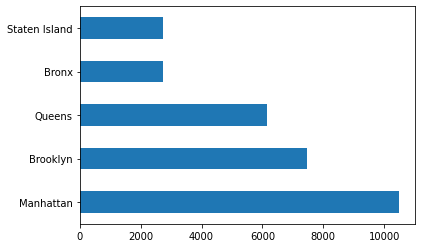

In [35]:
df.borough.value_counts().plot(kind = 'barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [36]:
df_pop = pd.read_csv("boro_population.csv")
df_pop.head()

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [37]:
df_borodog = pd.DataFrame(df.borough.value_counts())
df_borodog = df_borodog.reset_index()
df_borodog.columns = ['borough', 'dogs']

,borough,dogs
0,Manhattan,10478
1,Brooklyn,7466
2,Queens,6154
3,Bronx,2748
4,Staten Island,2727


In [38]:
df_borodog = df_borodog.merge(df_pop , on= 'borough')

In [40]:
df_borodog['dog_per_capita'] = df_borodog.dogs / df_borodog.population *100
df_borodog

,borough,dogs,population,area_sqmi,dog_per_capita
0,Manhattan,10478,1644518,23,0.637147
1,Brooklyn,7466,2636735,71,0.283153
2,Queens,6154,2339150,109,0.263087
3,Bronx,2748,1455444,42,0.188808
4,Staten Island,2727,474558,59,0.574640


### Answer : 
`Manhattan` has the highest dog per capita.

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

<AxesSubplot:xlabel='borough,Primary Breed'>

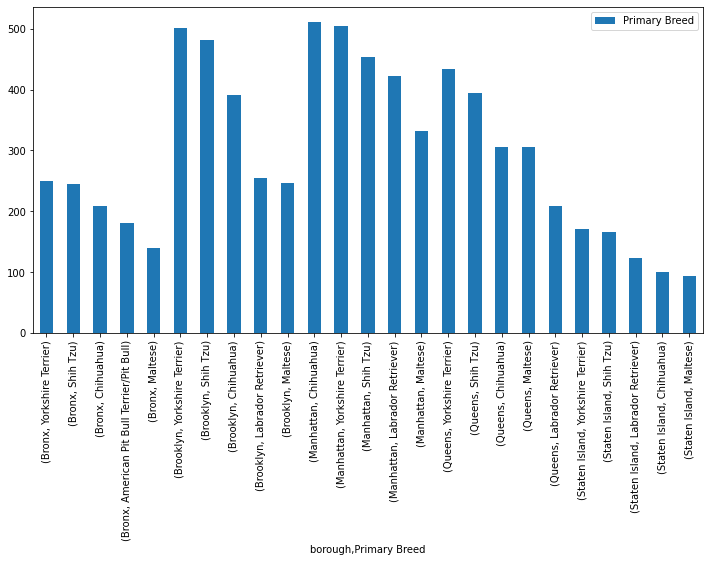

In [71]:
df_top5 = pd.DataFrame(df.groupby('borough')['Primary Breed'].value_counts())
df_top5.groupby(level=0).head(5).plot(kind = 'bar' , figsize=(12,6)  )

# I aslo tried this. Almost same, but xlabel is less beautiful.
# df_topf = pd.DataFrame(df.groupby('borough')['Primary Breed'].value_counts().groupby(level=0).nlargest(5))
# df_topf.plot(kind = 'bar' , figsize=(12,6) )

## What percentage of dogs are not guard dogs?

In [72]:
df['Guard or Trained'].value_counts(normalize=True)*100

No     99.945897
Yes     0.054103
Name: Guard or Trained, dtype: float64

### Answer : 
`99.943333%` of dogs are not guard dogs. Guard dogs are just 0.056667% instead of 0.085746%.